In [4]:
import numpy as np

#from assets.keras.keras.datasets import shapes_3d
from assets.keras.keras.preprocessing.image import ImageDataGenerator
from assets.keras.keras.models import Sequential
from assets.keras.keras.layers.core import Dense, Dropout, Activation, Flatten
from assets.keras.keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D
from assets.keras.keras.optimizers import SGD, RMSprop
from assets.keras.keras.utils import np_utils, generic_utils
from assets.keras.keras.regularizers import l2
import theano
import matplotlib.pyplot as plt
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

#load dataset from gen_dataset
import cPickle as pickle

Using Theano backend.
/root/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


In [2]:
import assets
print assets.keras.keras

import random



<module 'assets.keras.keras' from 'assets/keras/keras/__init__.pyc'>


In [3]:
data = pickle.load(open('assets/data/lr_ds.data','rb'))



IOError: [Errno 2] No such file or directory: 'assets/data/lr_ds.data'

In [5]:
from assets.gen_motion import gen_dataset
import math
#gen_dataset(size, N, types, velocity, theta, coherence, dots)
X_train,Y_train,X_test,Y_test = gen_dataset((16,32,32),20,['translate'],[1],[0,math.pi],[0],[150])



print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', Y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', Y_test.shape

###
#X_train = X_train[0:200,:,:,:,:]
#Y_train = Y_train[0:200]
#X_val = X_val[0:40,:,:,:,:]
#Y_val = Y_val[0:40]
# convert class vectors to binary class matrices

Y_train/=math.pi
Y_test/=math.pi
Y_train = np_utils.to_categorical(Y_train[:,2]-1, 2)
Y_test = np_utils.to_categorical(Y_test[:,2]-1, 2)

Train data shape:  (36, 1, 16, 32, 32)
Train labels shape:  (36, 5)
Test data shape:  (4, 1, 16, 32, 32)
Test labels shape:  (4, 5)


In [6]:

#(X_train, Y_train),(X_test, Y_test) = shapes_3d.load_data(test_split=test_split,
#                                                          dataset_size=dataset_size,
#                                                          patch_size=patch_size)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



('X_train shape:', (36, 1, 16, 32, 32))
('Y_train shape:', (36, 2))
('X_test shape:', (4, 1, 16, 32, 32))
('Y_test shape:', (4, 2))
(36, 'train samples')
(4, 'test samples')


In [7]:

# CNN Training parameters
batch_size = 20
nb_classes = 2
nb_epoch = 200


# number of convolutional filters to use at each layer
nb_filters = [2,2,2]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [2,2,2]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [3,3,3]

# Regularization
reg = 1e-4

model = Sequential()
#model.add(ZeroPadding3D((1,1,1),))
model.add(Convolution3D(nb_filters[0],len_conv_dim1=nb_conv[0], len_conv_dim2=nb_conv[0], len_conv_dim3=nb_conv[0], border_mode='valid',
                         activation='relu', W_regularizer=l2(reg),dim_ordering='th',input_shape=(1,16,32,32)))
model.add(MaxPooling3D(pool_size=(1, nb_pool[0], nb_pool[0])))
#model.add(Dropout(0.5))
#model.add(ZeroPadding3D((1,1,1)))
model.add(Convolution3D(nb_filters[1],len_conv_dim1=nb_conv[1], len_conv_dim2=nb_conv[1], len_conv_dim3=nb_conv[1], border_mode='valid',
                        activation='relu', W_regularizer=l2(reg)))
#model.add(MaxPooling3D(pool_size=(nb_pool[1], nb_pool[1], nb_pool[1])))
#model.add(Dropout(0.5))
#model.add(ZeroPadding3D((1,1,1)))
model.add(Convolution3D(nb_filters[2],len_conv_dim1=nb_conv[1], len_conv_dim2=nb_conv[1], len_conv_dim3=nb_conv[1], border_mode='valid',
                        activation='relu', W_regularizer=l2(reg)))
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(4, init='normal', activation='relu', W_regularizer=l2(reg)))
model.add(Dense(nb_classes, init='normal', W_regularizer=l2(reg)))
model.add(Activation('softmax'))

#Adam
sgd = RMSprop(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=sgd)

hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=1,
          validation_split=.1)
scoretr = model.evaluate(X_train, Y_train, batch_size=batch_size, show_accuracy=True)
#scoreva = model.evaluate(X_val, Y_val, batch_size=batch_size, show_accuracy=True)
scorete = model.evaluate(X_test, Y_test, batch_size=batch_size, show_accuracy=True)
print('Train loss:', scoretr[0])
print('Train accuracy:', scoretr[1])
#print('Val loss:', scoreva[0])
#print('Val accuracy:', scoreva[1])
print('Test loss:', scorete[0])
print('Test accuracy:', scorete[1])

Train on 32 samples, validate on 4 samples
Epoch 1/200
32/32 [==============================] - 0s - loss: 0.3565 - acc: 0.5625 - val_loss: 0.6312 - val_acc: 0.2500
Epoch 2/200
32/32 [==============================] - 0s - loss: 0.2877 - acc: 0.6562 - val_loss: 0.9994 - val_acc: 0.0000e+00
Epoch 3/200
32/32 [==============================] - 0s - loss: 0.3859 - acc: 0.6250 - val_loss: 0.9886 - val_acc: 0.0000e+00
Epoch 4/200
32/32 [==============================] - 0s - loss: 0.2924 - acc: 0.7188 - val_loss: 0.6190 - val_acc: 0.2500
Epoch 5/200
32/32 [==============================] - 0s - loss: 0.2675 - acc: 0.6250 - val_loss: 0.3757 - val_acc: 0.7500
Epoch 6/200
32/32 [==============================] - 0s - loss: 0.2374 - acc: 0.7188 - val_loss: 0.5382 - val_acc: 0.2500
Epoch 7/200
32/32 [==============================] - 0s - loss: 0.2078 - acc: 0.7812 - val_loss: 0.7869 - val_acc: 0.2500
Epoch 8/200
32/32 [==============================] - 0s - loss: 0.2332 - acc: 0.8125 - val_loss

['acc', 'loss', 'val_acc', 'val_loss']


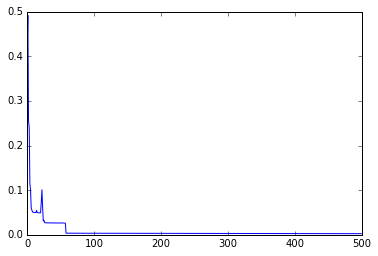

In [7]:
print model.history.history.keys()
plt.plot(np.asarray(model.history.history['loss'])[0:500])

In [12]:
# (#outputs,#inputs,time,x-dir,y-dir)
for layer in model.layers:
    g = layer.get_config()
    h = layer.get_weights()
    #print g
    for hi in h:
        #print hi
        print hi.shape

(2, 1, 3, 3, 3)
(2,)
(2, 2, 3, 3, 3)
(2,)
(2, 2, 3, 3, 3)
(2,)
(2420, 4)
(4,)
(4, 2)
(2,)


In [15]:
#print W
from assets.vis_utils import *
visualize_grid(W)

<IPython.core.display.Javascript object>

NameError: global name 'ubound' is not defined

In [37]:
from keras.utils.visualize_util import plot
plot(model, to_file='model.png')

RuntimeError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [13]:
# (#outputs,#inputs,time,x-dir,y-dir)
for layer in model.layers:
    g = layer.get_config()
    h = layer.get_weights()
    #print g
    for hi in h:
        W = hi
        break
    break

In [10]:
print W

[[[[[-0.044698    0.29893348  0.41026133]
    [ 0.23635654  0.42833021 -0.39726356]
    [ 0.36811495 -0.10547391  0.40902135]]

   [[-0.26721585  0.42906809 -0.36255577]
    [ 0.2394166  -0.17842375  0.42032194]
    [-0.34517136  0.18984902 -0.26625279]]

   [[-0.11241037 -0.27902734  0.10750291]
    [-0.36279556 -0.16292219 -0.17774701]
    [ 0.08546434 -0.05400881  0.13627054]]]]



 [[[[-0.19662143 -0.26556352  0.21787737]
    [-0.0644245   0.1335163  -0.22857766]
    [-0.02546232  0.39113635  0.10016966]]

   [[ 0.15129283  0.33332697  0.25587597]
    [-0.36984891  0.38875678 -0.21104184]
    [ 0.29168111 -0.39151013  0.3935957 ]]

   [[-0.18387027 -0.06315565  0.04403156]
    [-0.15857984 -0.23264916  0.40255022]
    [-0.08293972  0.14252147 -0.13946614]]]]]
